
Install the required dependency "opendatasets".
Create kaggle.json file (need for dataset download)

In [ ]:
!pip install opendatasets
!echo "{\"username\":\"lauraalexandra1\",\"key\":\"81f199618f4cd82db5003d4d29887bd8\"}" > kaggle.json

Download dataset  
od.download() looks for a kaggle.json file to authenticate to the platform to download the dataset

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data")

100%|██████████| 2.54k/2.54k [00:00<00:00, 1.26MB/s]

Create DataFrame

In [ ]:
import pandas as pd

df = pd.read_csv("sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")

DataFrame information display

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Display the first 5 rows of the dataframe. You can display more by giving a number as an argument to the function ```head()```.

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Redundant Person ID => we eliminate

In [ ]:
df = df.drop(columns=["Person ID"])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Exploration of Object type data (in our case Strings). eg: Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
They should be remapped to numerical data

In [ ]:
print("Numarul de valori unice:")
for feature in ["Gender", "Occupation", "BMI Category", "Blood Pressure", "Sleep Disorder"] :
  print(feature, ":", df[feature].unique(), "Count:", df[feature].nunique())

Numarul de valori unice:
Gender : ['Male' 'Female'] Count: 2
Occupation : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager'] Count: 11
BMI Category : ['Overweight' 'Normal' 'Obese' 'Normal Weight'] Count: 4
Blood Pressure : ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75'] Count: 25
Sleep Disorder : ['None' 'Sleep Apnea' 'Insomnia'] Count: 3


Blood Pressure can be divided into Systolic BP and Diastolic BP

In [ ]:
#we define functions that help us extract the desired information from an element

def get_systolic(blood_pessure) :
  [systolic, diastolic] = blood_pessure.split("/") #split blood_pessure in 2 elements "<systolic>/<diastolic>"
  return float(systolic) #we return the float interpretation of the systolic

def get_diastolic(blood_pessure) :
  [systolic, diastolic] = blood_pessure.split("/") #split blood_pessure in 2 elements "<systolic>/<diastolic>"
  return float(diastolic) #we return the float interpretation of the diastolic

#we add new columns generated by applying the functions defined above on each individual element
df["Systolic BP"] = df['Blood Pressure'].apply(get_systolic)
df["Diastolic BP"] = df['Blood Pressure'].apply(get_diastolic)

df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


we eliminate the blood pressure column

In [ ]:
df = df.drop(columns=["Blood Pressure"])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


generate the correlation matrix

In [ ]:
corr_mat = df.corr()
display(corr_mat)

<ipython-input-10-2528a9142a7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.605878,0.593839
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986
Systolic BP,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885
Diastolic BP,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000


Generate Heatmap

<Axes: >

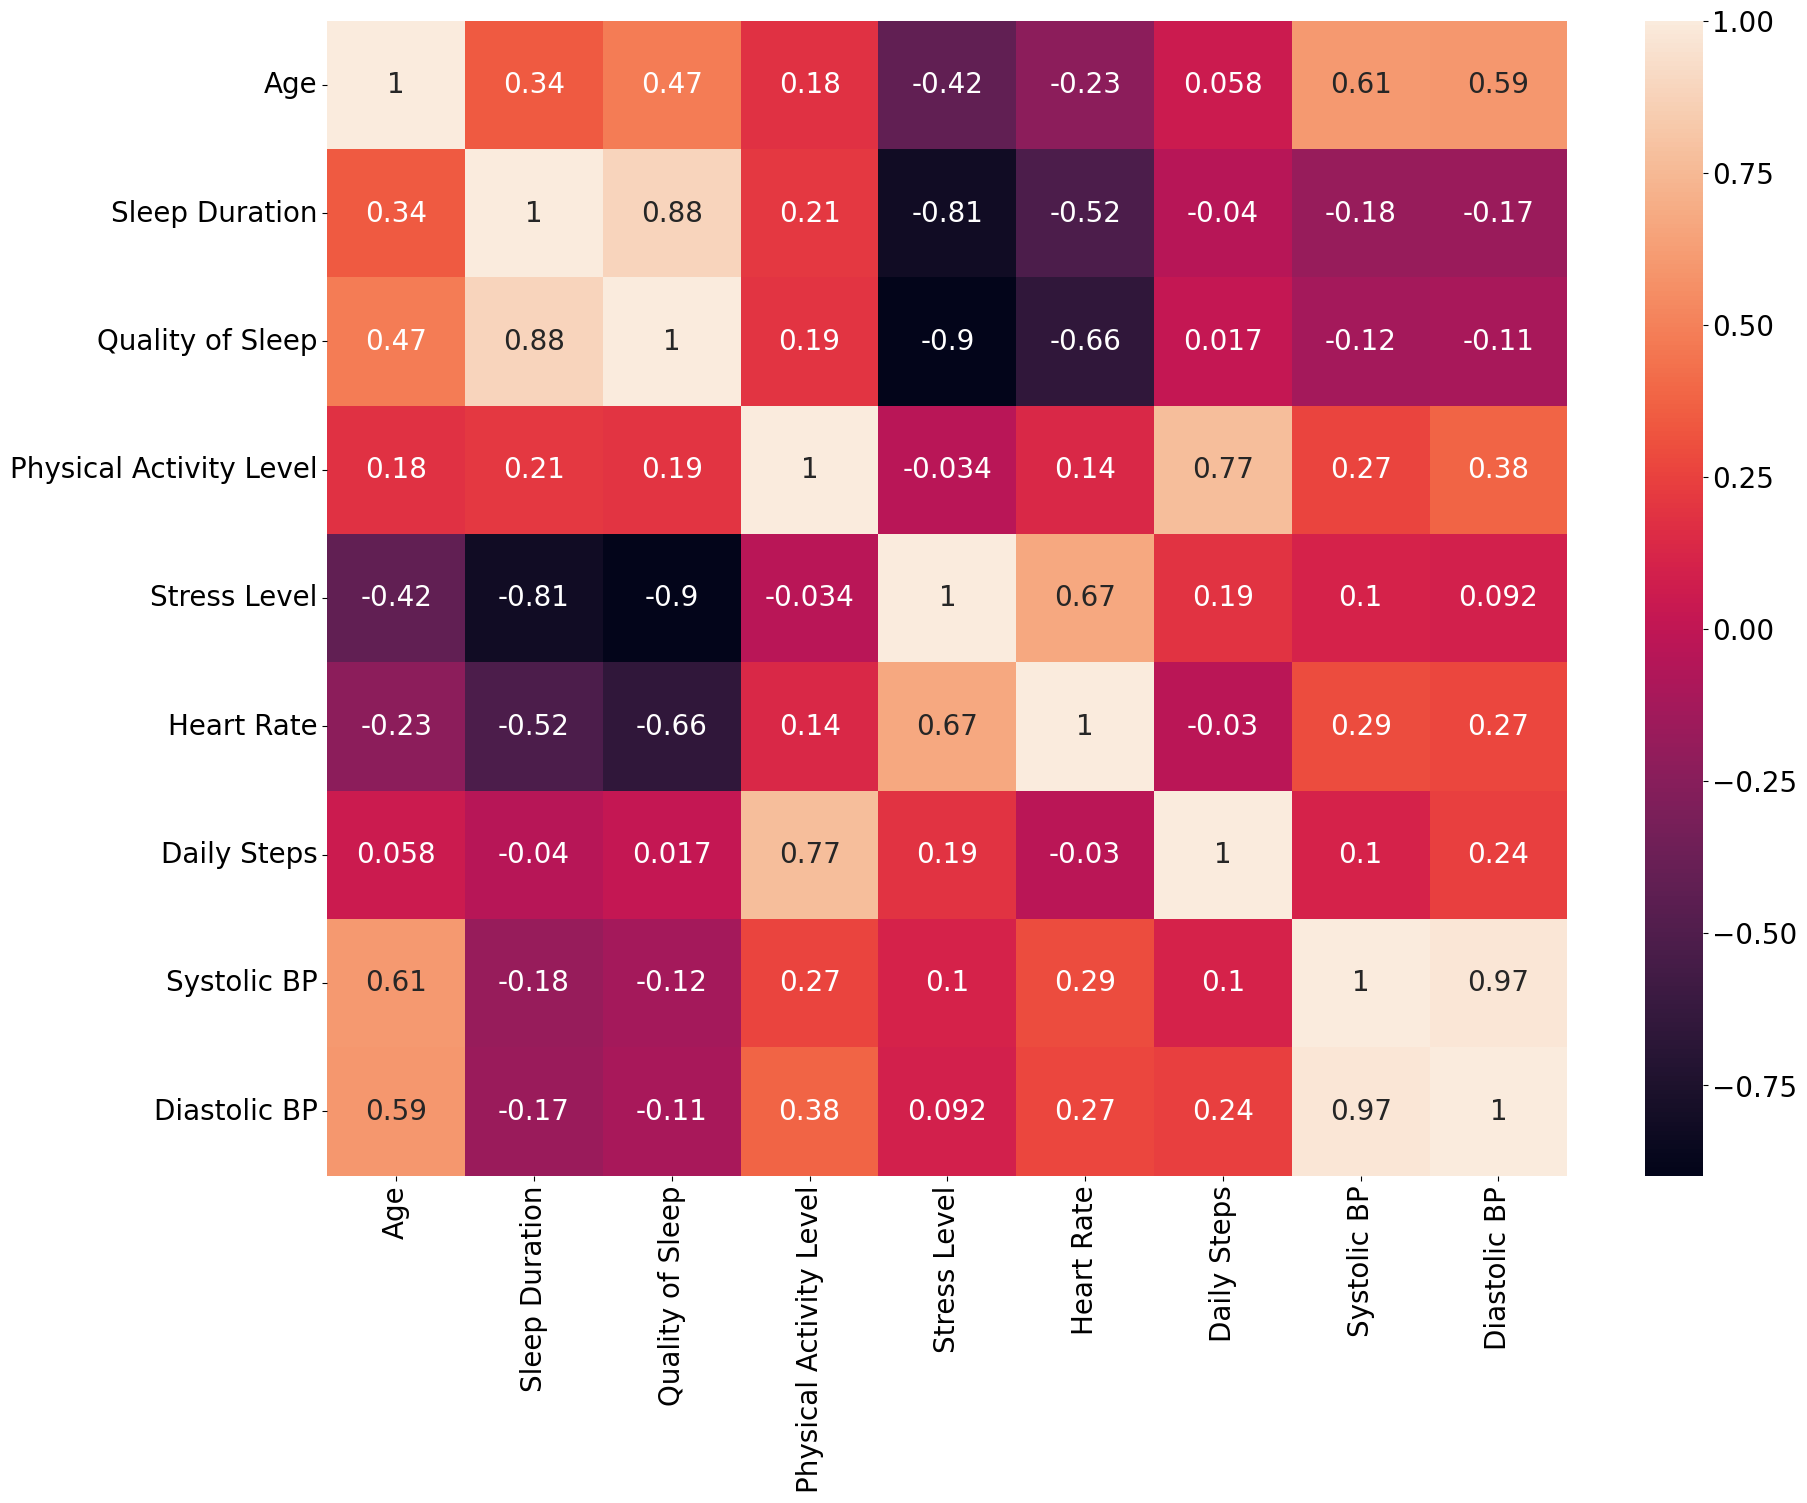

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 20})
plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat, annot=True)

Generate Pairplot Quality of Sleep - Physical Activity Level

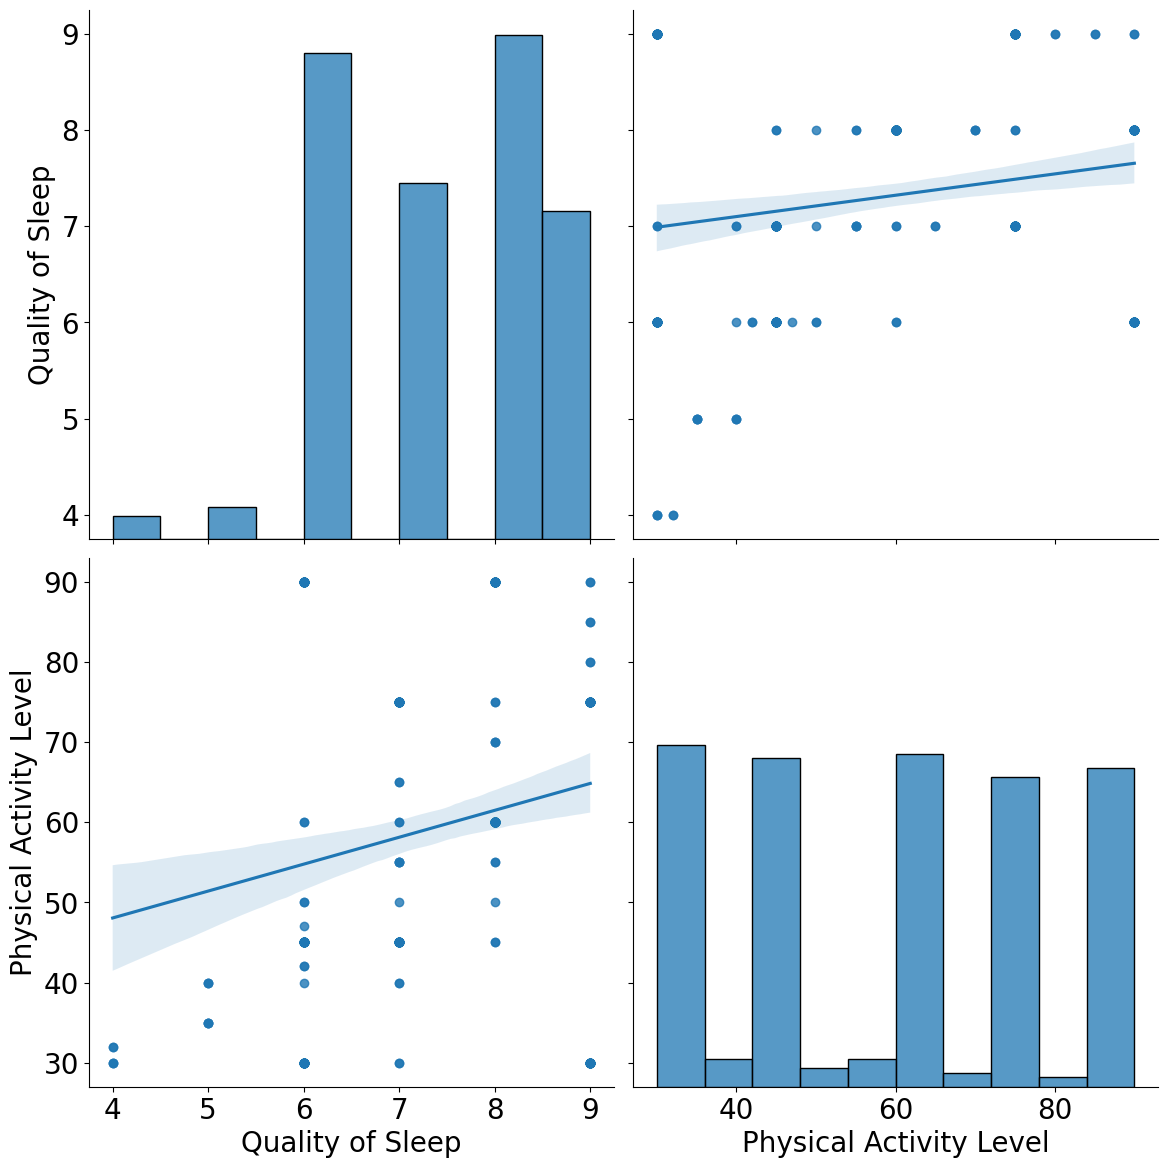

In [ ]:
sns.pairplot(df[['Quality of Sleep', 'Physical Activity Level']], kind='reg', height=6)

Generate Pairplot Sleep Duration - Stress Level

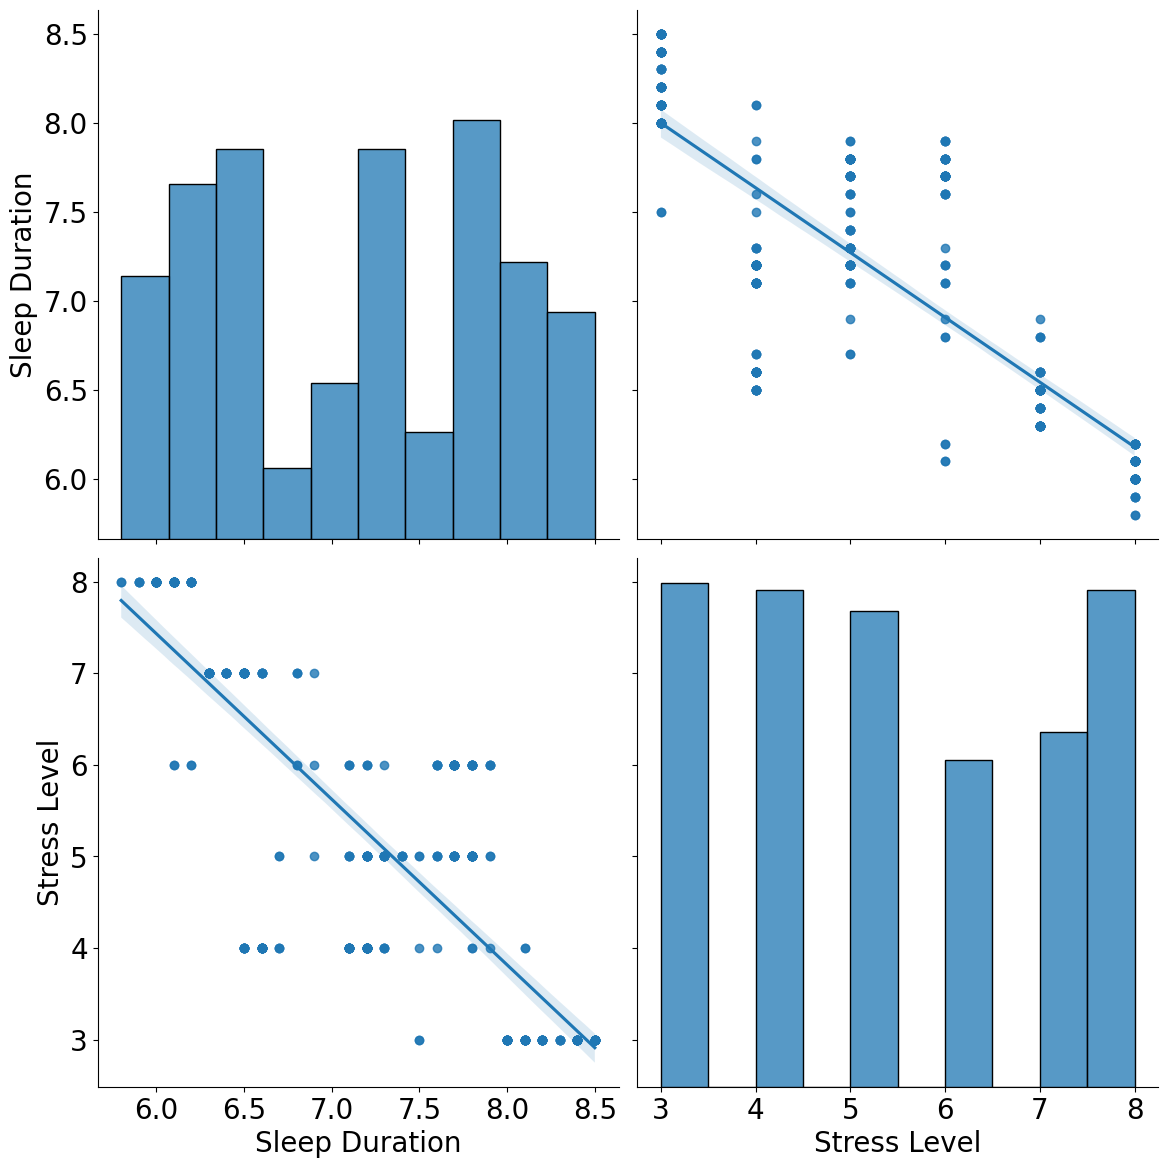

In [ ]:
sns.pairplot(df[['Sleep Duration', 'Stress Level']], kind='reg', height=6)

Generate Scatterplot Quality of Sleep - Physical Activity Level

<Axes: xlabel='Quality of Sleep', ylabel='Physical Activity Level'>

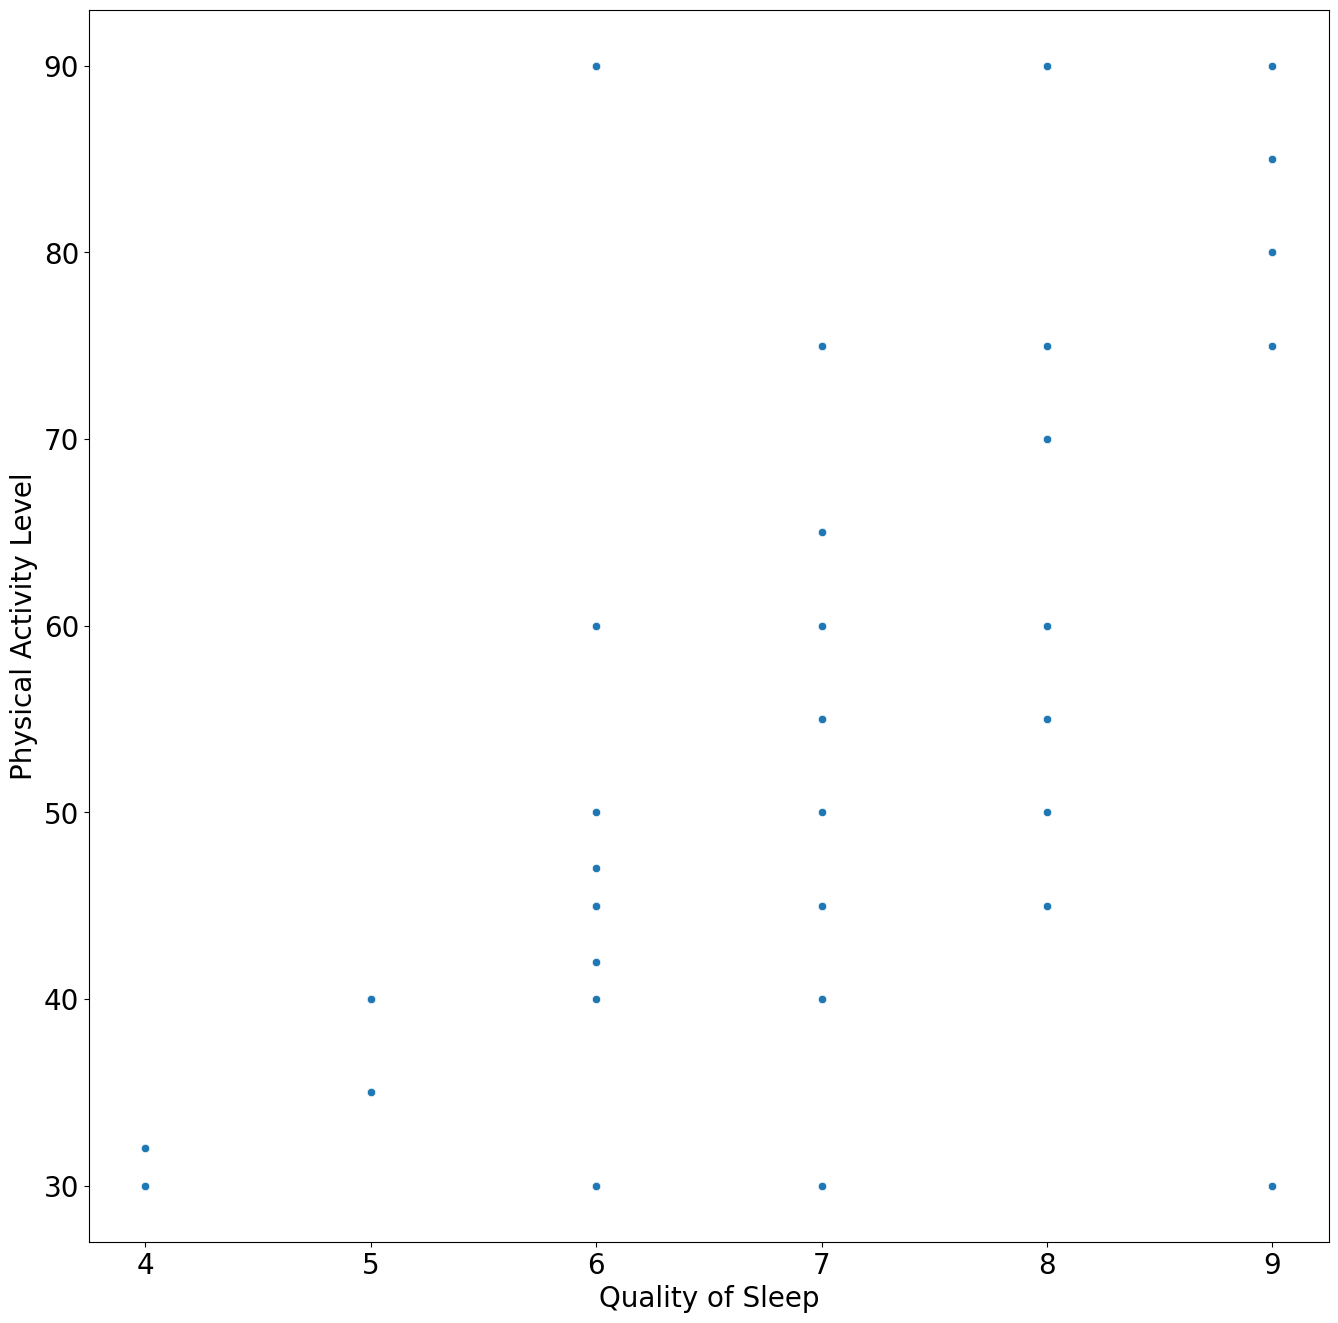

In [ ]:
plt.figure(figsize=(16,16))
sns.scatterplot(x=df['Quality of Sleep'], y = df['Physical Activity Level'])

Generate Scatterplot Sleep Duration - Stress Level

<Axes: xlabel='Sleep Duration', ylabel='Stress Level'>

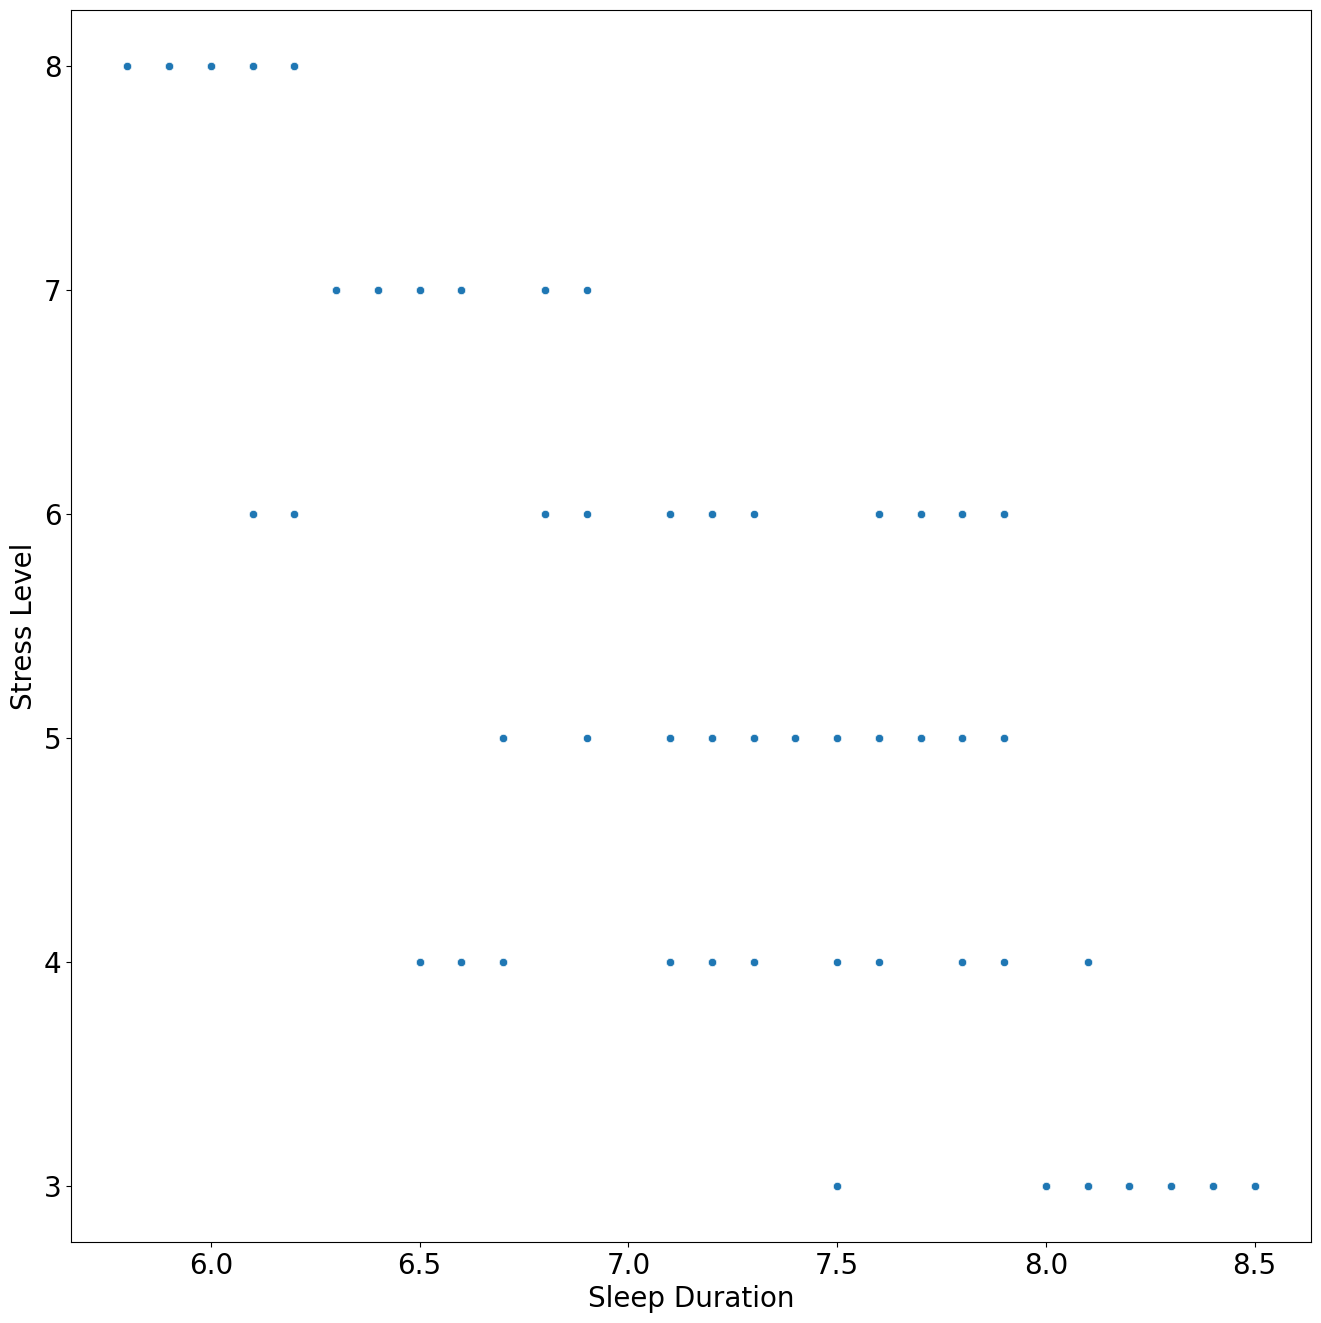

In [ ]:
plt.figure(figsize=(16,16))
sns.scatterplot(x=df['Sleep Duration'], y = df['Stress Level'])

In [ ]:
import numpy as np

reg_df = df[['Sleep Duration', 'Quality of Sleep']]
reg_df.head()

,Sleep Duration,Quality of Sleep
0,6.1,6
1,6.2,6
2,6.2,6
3,5.9,4
4,5.9,4


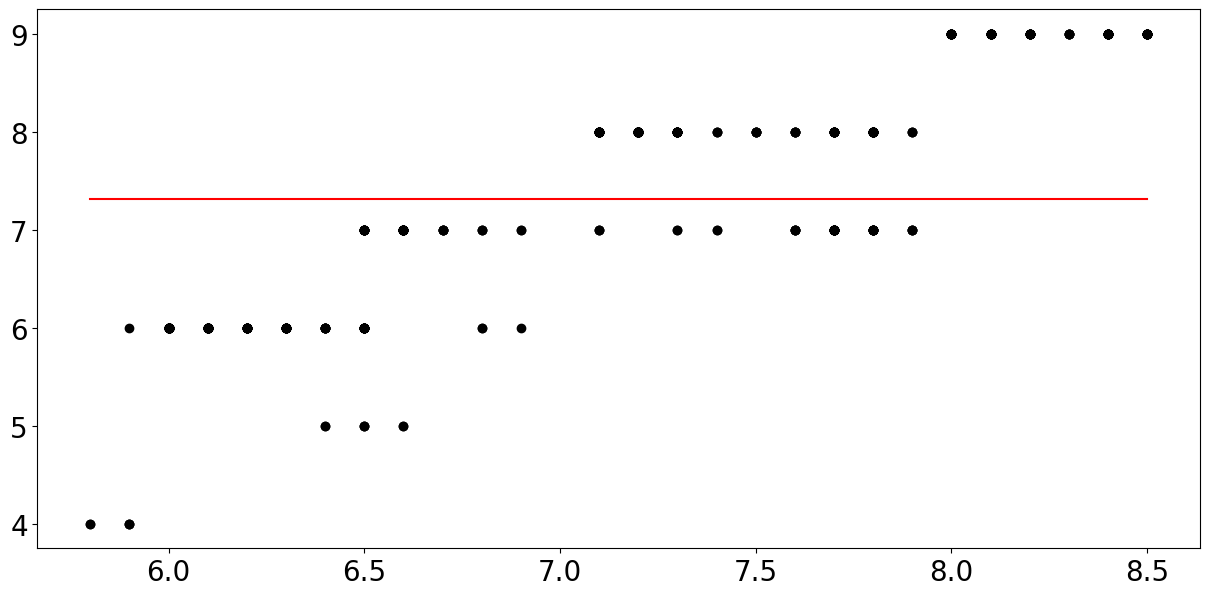

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = plt.gca()
ax.scatter(reg_df['Sleep Duration'], reg_df['Quality of Sleep'], c='k')
ax.plot((reg_df['Sleep Duration'].min(), reg_df['Sleep Duration'].max()),(np.mean(reg_df['Quality of Sleep']), np.mean(reg_df['Quality of Sleep'])), color='r');

In [ ]:
reg_df['Mean_Yhat'] = reg_df['Quality of Sleep'].mean()

<ipython-input-18-576f3bf6f9ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['Mean_Yhat'] = reg_df['Quality of Sleep'].mean()


In [ ]:
y_bar = df['Quality of Sleep'].mean()
x_bar = df['Sleep Duration'].mean()
std_y = np.std(df['Quality of Sleep'], ddof = 1)
std_x = np.std(df['Sleep Duration'], ddof = 1)
r_xy = df.corr().loc['Sleep Duration','Quality of Sleep']
beta_1 = r_xy*(std_y/std_x)
beta_0 = y_bar - beta_1*x_bar

<ipython-input-19-3a75de830dee>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r_xy = df.corr().loc['Sleep Duration','Quality of Sleep']


In [ ]:
reg_df['Linear_Yhat'] = beta_0 + beta_1 * reg_df['Sleep Duration']

<ipython-input-20-511f8058b7b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['Linear_Yhat'] = beta_0 + beta_1 * reg_df['Sleep Duration']


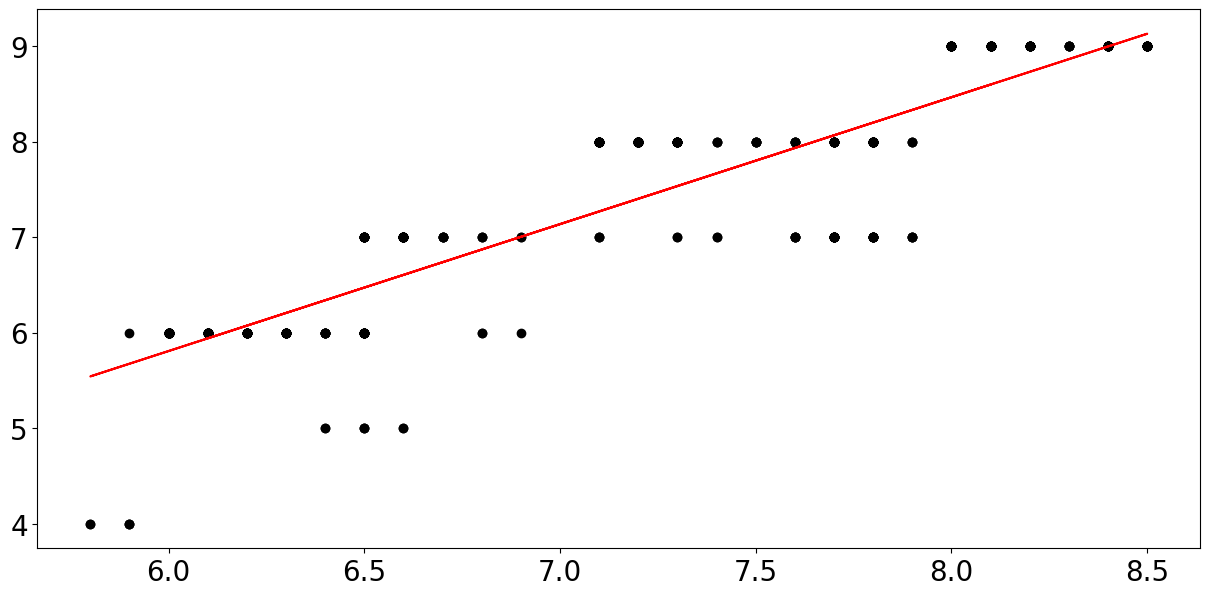

In [ ]:
fig = plt.figure(figsize=(15,7))

ax = plt.gca()
ax.scatter(reg_df['Sleep Duration'], reg_df['Quality of Sleep'], c='k')
ax.plot(reg_df['Sleep Duration'], reg_df['Linear_Yhat'], color='r');

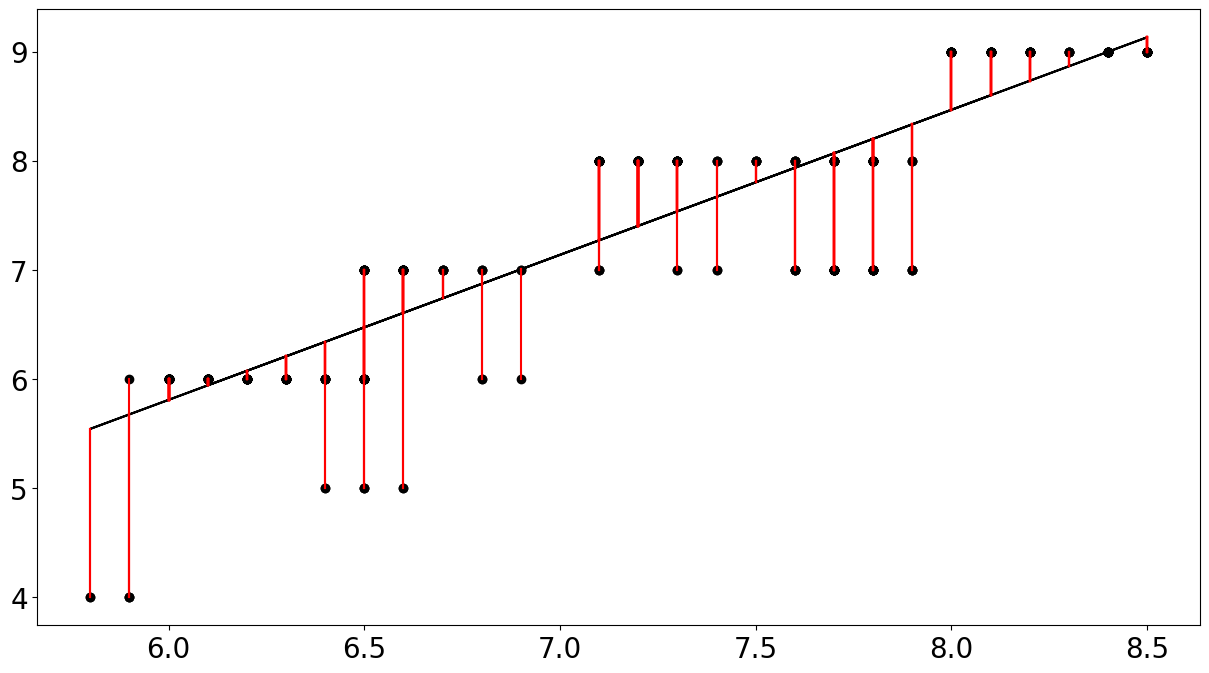

In [ ]:
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)
ax = fig.gca()

ax.scatter(x=reg_df['Sleep Duration'], y=reg_df['Quality of Sleep'], c='k')
ax.plot(reg_df['Sleep Duration'], reg_df['Linear_Yhat'], color='k');

for _, row in reg_df.iterrows():
    plt.plot((row['Sleep Duration'], row['Sleep Duration']), (row['Quality of Sleep'], row['Linear_Yhat']), 'r-')

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [ ]:
import statsmodels.api as sm

In [ ]:
stress = df['Stress Level'].values
target = pd.DataFrame(stress)
print(target.shape)

(374, 1)


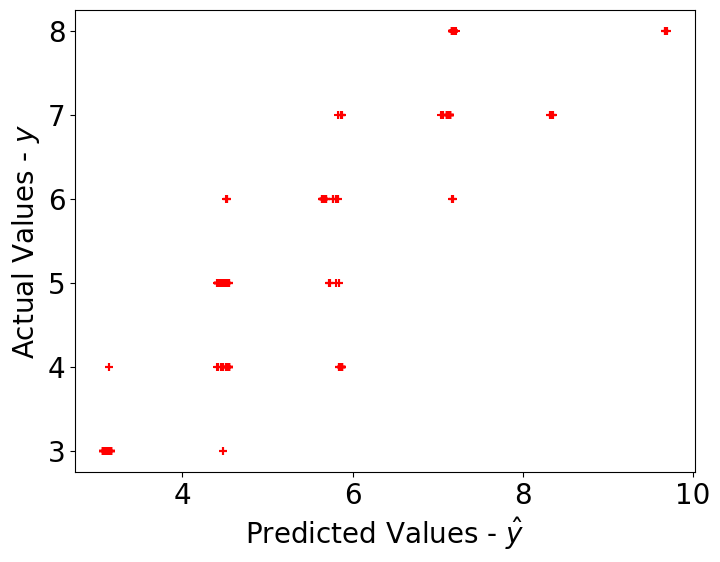

In [ ]:
X = df[['Sleep Duration','Quality of Sleep']].values
X = sm.add_constant(X)
y = target

model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     786.2
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          3.86e-134
Time:                        12:44:44   Log-Likelihood:                -435.01
No. Observations:                 374   AIC:                             876.0
Df Residuals:                     371   BIC:                             887.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6250      0.395     39.577      0.000      14.849      16.401
x1            -0.1748      0.108     -1.620      0.106      -0.387       0.037
x2            -1.2298      0.072    -17.151      0.000      -1.371      -1.089
==============================================================================
Omnibus:                       41.654   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.436
Skew:                          -0.897   Prob(JB):                     4.11e-12
Kurtosis:                       3.381   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""